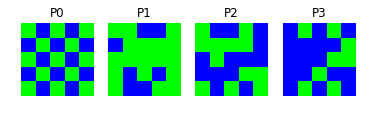

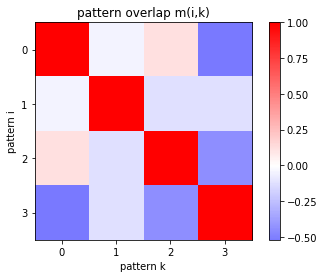

In [10]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from neurodynex.hopfield_network import network, pattern_tools, plot_tools

pattern_size = 5

# create an instance of the class HopfieldNetwork
hopfield_net = network.HopfieldNetwork(nr_neurons= pattern_size**2)

# instantiate a pattern factory
factory = pattern_tools.PatternFactory(pattern_size, pattern_size)

# create a checkerboard pattern and add it to the pattern list
checkerboard = factory.create_checkerboard()
pattern_list = [checkerboard]



# add random patterns to the list
pattern_list.extend(factory.create_random_pattern_list(nr_patterns=3, on_probability=0.5))
plot_tools.plot_pattern_list(pattern_list)

# how similar are the random patterns and the checkerboard? Check the overlaps
overlap_matrix = pattern_tools.compute_overlap_matrix(pattern_list)
plot_tools.plot_overlap_matrix(overlap_matrix);


"""
def compute_overlap_list(reference_pattern, pattern_list, nrOfNeurons):    
    # Computes the overlap between the reference_pattern and each pattern in pattern_list
    overlap = np.zeros(len(pattern_list))
    for i in range(0, len(pattern_list)):
        overlap[i] = np.sum(reference_pattern * pattern_list[i]) / nrOfNeurons
    return overlap
""";


In [11]:
# let the hopfield network "learn" the patterns. Note: they are not stored
# explicitly but only network weights are updated !
hopfield_net.store_patterns(pattern_list)


"""
    def store_patterns(pattern_list, nrOfNeurons,nrOfNeurons):
        weights = np.zeros((nrOfNeurons, nrOfNeurons))
        
        # textbook formula to compute the weights:
        for p in pattern_list:
            p_flat = p.flatten()
            for i in range(nrOfNeurons):
                for k in range(nrOfNeurons):
                    self.weights[i, k] += p_flat[i] * p_flat[k]
        weights /= nrOfNeurons
        
        # no self connections:
        np.fill_diagonal(weights, 0)
    return weights
""";


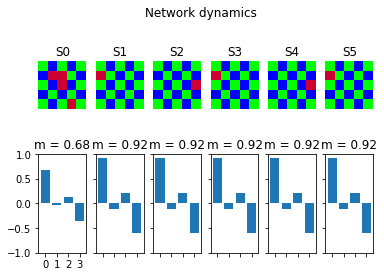

In [12]:
# create a noisy version of a pattern and use that to initialize the network
pattern_number = 0
noisy_init_state = pattern_tools.flip_n(pattern_list[pattern_number], nr_of_flips=4)#checkerboard
hopfield_net.set_state_from_pattern(noisy_init_state)


# from this initial state, let the network dynamics evolve.
states = hopfield_net.run_with_monitoring(nr_steps=5)

"""
    def upd(state_s0, weights):
        h = np.sum(weights * state_s0, axis=1)
        s1 = np.sign(h)
        
        # by definition, neurons have state +/-1. If the
        # sign function returns 0, we set it to +1
        idx0 = s1 == 0
        s1[idx0] = 1
        return s1
    return upd
""";

# each network state is a vector. reshape it to the same shape used to create the patterns.
states_as_patterns = factory.reshape_patterns(states)
# plot the states of the network
plot_tools.plot_state_sequence_and_overlap(states_as_patterns, pattern_list, reference_idx=pattern_number, suptitle="Network dynamics")


the alphabet is stored in an object of type: <class 'dict'>
letters are patterns of size: (10, 10). Create a network of corresponding size


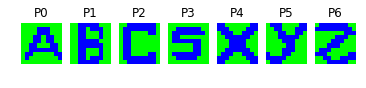

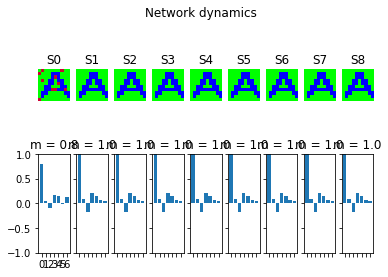

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
from neurodynex.hopfield_network import network, pattern_tools, plot_tools
import numpy

# the letters we want to store in the hopfield network
letter_list = ['A', 'B', 'C', 'S', 'X', 'Y', 'Z']

# set a seed to reproduce the same noise in the next run
# numpy.random.seed(123)

abc_dictionary =pattern_tools.load_alphabet()
print("the alphabet is stored in an object of type: {}".format(type(abc_dictionary)))
# access the first element and get it's size (they are all of same size)
pattern_shape = abc_dictionary['A'].shape
print("letters are patterns of size: {}. Create a network of corresponding size".format(pattern_shape))
# create an instance of the class HopfieldNetwork
hopfield_net = network.HopfieldNetwork(nr_neurons= pattern_shape[0]*pattern_shape[1])

# create a list using Pythons List Comprehension syntax:
pattern_list = [abc_dictionary[key] for key in letter_list ]
plot_tools.plot_pattern_list(pattern_list)

# store the patterns
hopfield_net.store_patterns(pattern_list)

pattern_list[0].shape
# # create a noisy version of a pattern and use that to initialize the network
noisy_init_state = pattern_tools.flip_n(abc_dictionary['A'], nr_of_flips=10)#checkerboard

hopfield_net.set_state_from_pattern(noisy_init_state)

# from this initial state, let the network dynamics evolve.
states = hopfield_net.run_with_monitoring(nr_steps=8)

# each network state is a vector. reshape it to the same shape used to create the patterns.
states_as_patterns = pattern_tools.reshape_patterns(states, pattern_list[0].shape)

# plot the states of the network
plot_tools.plot_state_sequence_and_overlap(
    states_as_patterns, pattern_list, reference_idx=0, suptitle="Network dynamics")
